In [1]:
# Import Matplot lib and use the `nbagg` backend

import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import pandas as pd
import os
from time import time
from datetime import datetime, timedelta, date 
import numpy as np

import sqlalchemy
from sqlalchemy import and_
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
Hawaii_DBPath = os.path.join('Resources', 'hawaii.sqlite')

print (Hawaii_DBPath)

Hawaii_sqlite = 'sqlite:///' + Hawaii_DBPath

print(Hawaii_sqlite)



Resources/hawaii.sqlite
sqlite:///Resources/hawaii.sqlite


In [3]:
engine = create_engine(Hawaii_sqlite)

In [4]:
#Use Inspector to find the table names 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
# Iterate and find the column names and values
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    
print()

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station_code VARCHAR(30)
date DATE
prcp FLOAT
tobs INTEGER

station_code VARCHAR(30)
station_name VARCHAR(200)
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
#testing queries on it 
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [7]:
# Reflect Database into ORM class - Create one for Station and one for Measurement 
Base = automap_base()
Base.prepare(engine, reflect=True)

Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
#Create a session variable to query Database
session = Session(engine)

In [9]:
# PRECIPITATION ANALYSIS 
# =======================
#Pull Data as per request for the last 12 months info 
Curr_Date = datetime.today().date()

print (Curr_Date)

One_year_ago_date = Curr_Date - timedelta(days=365)

print(One_year_ago_date)

2018-02-10
2017-02-10


In [10]:
results = session.query(Measurement.date, Measurement.prcp).\
    filter(and_(Measurement.date <= Curr_Date, Measurement.date >= One_year_ago_date)).\
    order_by(Measurement.date.desc()).all()

#qry = DBSession.query(User).filter(
#        and_(User.birthday <= '1988-01-17', User.birthday >= '1985-01-17'))


In [11]:
#Pull data into a data frame
precp_df = pd.DataFrame(results, columns=['date', 'prcp'])
precp_df.set_index('date', inplace=True, )

precp_df.head(10)

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


In [12]:
print(precp_df.index.min())

print(precp_df.index.max())

2017-02-10
2017-08-23


In [13]:
xTickMarks = precp_df.index.values.tolist()

print(xTickMarks)

prcp = precp_df['prcp'].values.tolist()

print(prcp)

print(len(prcp))

[datetime.date(2017, 8, 23), datetime.date(2017, 8, 23), datetime.date(2017, 8, 23), datetime.date(2017, 8, 23), datetime.date(2017, 8, 22), datetime.date(2017, 8, 22), datetime.date(2017, 8, 22), datetime.date(2017, 8, 21), datetime.date(2017, 8, 21), datetime.date(2017, 8, 21), datetime.date(2017, 8, 20), datetime.date(2017, 8, 20), datetime.date(2017, 8, 19), datetime.date(2017, 8, 19), datetime.date(2017, 8, 19), datetime.date(2017, 8, 18), datetime.date(2017, 8, 18), datetime.date(2017, 8, 18), datetime.date(2017, 8, 17), datetime.date(2017, 8, 17), datetime.date(2017, 8, 17), datetime.date(2017, 8, 17), datetime.date(2017, 8, 16), datetime.date(2017, 8, 16), datetime.date(2017, 8, 16), datetime.date(2017, 8, 16), datetime.date(2017, 8, 15), datetime.date(2017, 8, 15), datetime.date(2017, 8, 15), datetime.date(2017, 8, 15), datetime.date(2017, 8, 15), datetime.date(2017, 8, 14), datetime.date(2017, 8, 14), datetime.date(2017, 8, 14), datetime.date(2017, 8, 14), datetime.date(2017,

<IPython.core.display.Javascript object>


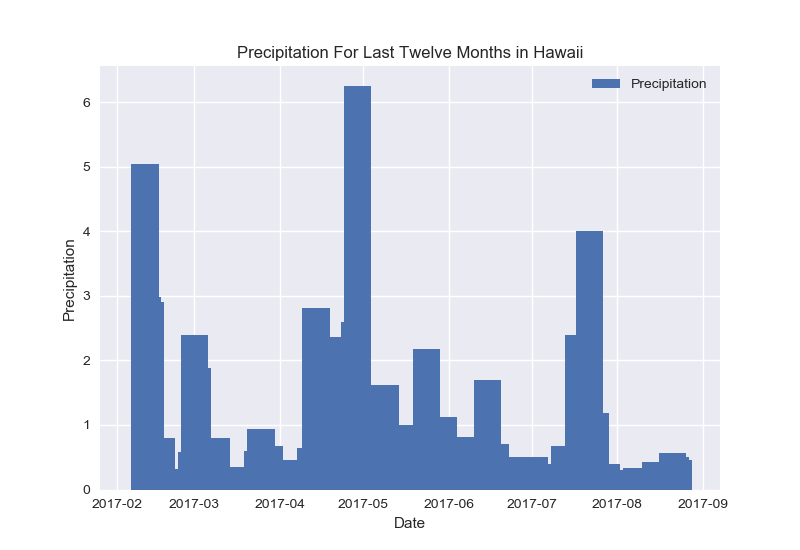

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

#x = [datetime.datetime(2010, 12, 1, 10, 0),
 #   datetime.datetime(2011, 1, 4, 9, 0),
  #  datetime.datetime(2011, 5, 5, 9, 0)]
#y = [4, 9, 2]

#ax = plt.subplot(111)

#plt.xticks(rotation=45)
ax = plt.subplot()
#fig, ax = plt.subplots()

ax.bar(xTickMarks, prcp, width=10, label='Precipitation')

#xtickNames = ax.set_xticklabels(xTickMarks)
#plt.setp(xtickNames, rotation=45, fontsize=10)

ax.legend(loc='best')

ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_title("Precipitation For Last Twelve Months in Hawaii")
ax.xaxis_date()
ax.autoscale_view()

plt.show()

fig = ax.get_figure()
fig.savefig('Results/precipitation_summary.pdf')

In [15]:
# STATION ANALYSIS:
#==================
# Find the Total Number of Stations: 

#results = session.query(Measurement.date, Measurement.prcp).\
 #   filter(and_(Measurement.date <= Curr_Date, Measurement.date >= One_year_ago_date)).\
  #  order_by(Measurement.date.desc()).all()
    
results = session.query(func.count(Station.station_code)).select_from(Station).scalar()

print ("No of Stations: " + str(results) )
#session.query(func.count('*')).select_from(User).scalar()



No of Stations: 9


In [16]:
# List the stations and observation counts in descending order
results2 = session.query(Measurement.station_code, func.count(Measurement.station_code)).\
            group_by(Measurement.station_code).\
            order_by(func.count(Measurement.station_code).desc()).all()

print(results2)

stations_df = pd.DataFrame(results2, columns=['station_code', 'observation_count'])


stations_df.head(10)

[('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]


,station_code,observation_count
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [17]:
# Which station has the highest number of observations?
results3 = session.query(Measurement.station_code).\
            group_by(Measurement.station_code).\
            order_by(func.count(Measurement.station_code).desc()).first()
        
print("Station with highest number of Observations: " + str(results3) )

Station with highest number of Observations: ('USC00519281',)


In [18]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).

results4 = session.query(Measurement.date, Measurement.tobs, Measurement.station_code).\
            filter(and_(Measurement.date <= Curr_Date, Measurement.date >= One_year_ago_date)).\
            order_by(Measurement.date.desc()).all()

tobs_df = pd.DataFrame(results4, columns=['date', 'temperature_observation', 'station_code'])
#tobs_df.set_index('date', inplace=True, )

tobs_df.head(10)

,date,temperature_observation,station_code
0,2017-08-23,81,USC00519397
1,2017-08-23,82,USC00514830
2,2017-08-23,82,USC00519523
3,2017-08-23,76,USC00516128
4,2017-08-22,82,USC00519397
5,2017-08-22,82,USC00519523
6,2017-08-22,76,USC00516128
7,2017-08-21,81,USC00519397
8,2017-08-21,79,USC00514830
9,2017-08-21,76,USC00516128


In [19]:
print (len(tobs_df))

1041


In [20]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs) 
#            (AND)
# Filter by the station with the highest number of observations.

#To get above: 
#Step 1/2: Find the Station with the Highest number of Obesrvations for the last 12 months 
results5 = session.query(func.count(Measurement.tobs), Measurement.station_code).\
            filter(and_(Measurement.date <= Curr_Date, Measurement.date >= One_year_ago_date)).\
            group_by(Measurement.station_code).\
            order_by(func.count(Measurement.tobs).desc()).all()
            
tobs_df2 = pd.DataFrame(results5, columns=['temperature_observation_count', 'station_code'])
#tobs_df.set_index('date', inplace=True, )

tobs_df2.head(10)


,temperature_observation_count,station_code
0,190,USC00519397
1,181,USC00519281
2,172,USC00513117
3,166,USC00516128
4,162,USC00519523
5,139,USC00514830
6,31,USC00517948


In [21]:
# Step 2: Filter by the station with the highest number of obesrvatiosn for the last 12 months 
# and then use that to plot a graph. 

results6 = session.query(Measurement.tobs, func.count(Measurement.id)).\
            filter(and_(Measurement.date <= Curr_Date, Measurement.date >= One_year_ago_date, Measurement.station_code == 'USC00519397' )).\
            group_by(Measurement.tobs).\
            order_by(Measurement.tobs.asc()).all()
            
tobs_df3 = pd.DataFrame(results6, columns=['tobs', 'observation_count'])
#tobs_df.set_index('date', inplace=True, )

tobs_df3.head(25)

#print (len(tobs_df3))

,tobs,observation_count
0,63,1
1,64,1
2,65,1
3,66,1
4,68,4
5,69,5
6,70,4
7,71,10
8,72,6
9,73,7


In [22]:
print(tobs_df3['tobs'].min())

print(tobs_df3['tobs'].max())


63
87


In [23]:
x_values = tobs_df3['tobs'].values.tolist()
print(x_values)
print()
y_values = tobs_df3['observation_count'].values.tolist()
print(y_values)

[63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 87]

[1, 1, 1, 1, 4, 5, 4, 10, 6, 7, 10, 11, 13, 19, 22, 24, 32, 15, 2, 1, 1]


<IPython.core.display.Javascript object>


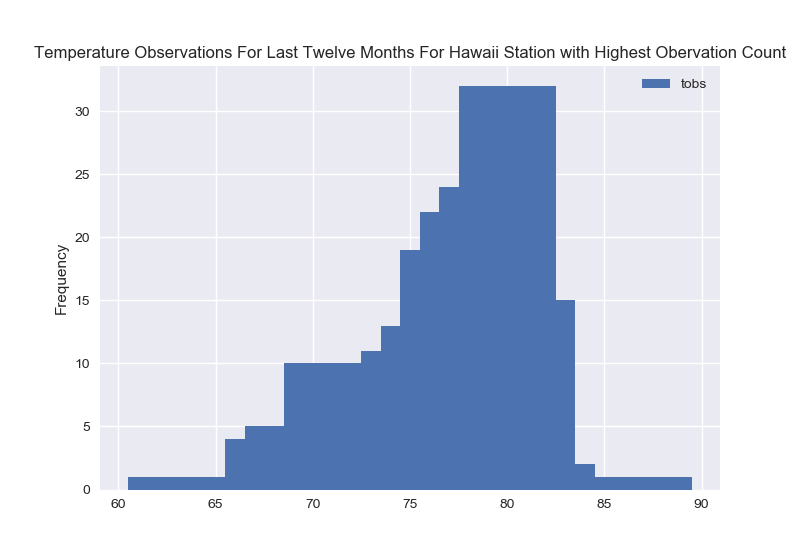

In [24]:
ax = plt.subplot()
#fig, ax = plt.subplots()

ax.bar(x_values, y_values, width = 5, label='tobs')

#xtickNames = ax.set_xticklabels(xTickMarks)
#plt.setp(xtickNames, rotation=45, fontsize=10)

ax.legend(loc='best')

#ax.set_xlabel("Date")
ax.set_ylabel("Frequency")
ax.set_title("Temperature Observations For Last Twelve Months For Hawaii Station with Highest Obervation Count")
#ax.xaxis_date()
#ax.autoscale_view()

plt.show()

fig = ax.get_figure()
fig.savefig('Results/tobs_summary_station_WithHighest_ObservationCount.pdf')

In [25]:
# Now do Histogram for all Stations in the Last 12 months to see any difference in pattern 
results7 = session.query(Measurement.tobs, func.count(Measurement.id)).\
            filter(and_(Measurement.date <= Curr_Date, Measurement.date >= One_year_ago_date )).\
            group_by(Measurement.tobs).\
            order_by(Measurement.tobs.asc()).all()
            
tobs_df4 = pd.DataFrame(results7, columns=['tobs', 'observation_count'])
#tobs_df.set_index('date', inplace=True, )

tobs_df4.head(30)

,tobs,observation_count
0,58,1
1,60,1
2,61,2
3,62,2
4,63,4
5,64,7
6,65,10
7,66,11
8,67,16
9,68,22


<IPython.core.display.Javascript object>


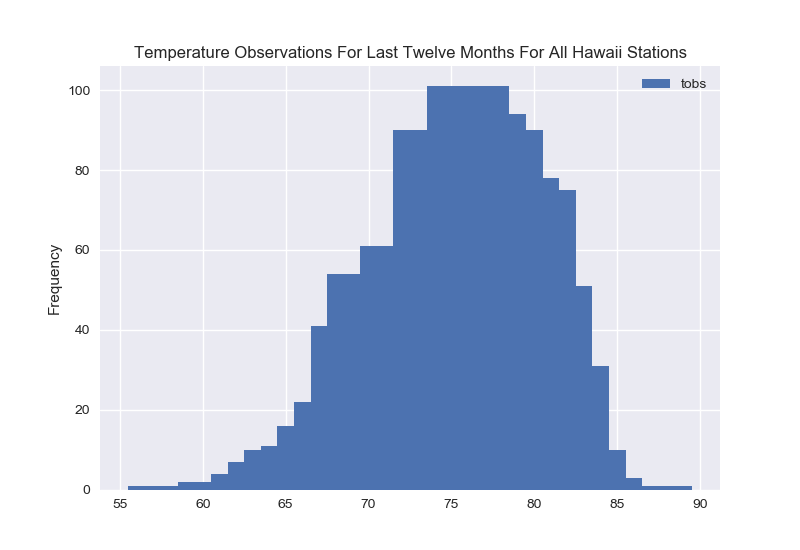

In [26]:
# Show TOBS for the last 12 months for all Stations 

ax = plt.subplot()
#fig, ax = plt.subplots()
x_values = tobs_df4['tobs'].values.tolist()

y_values = tobs_df4['observation_count'].values.tolist()

ax.bar(x_values, y_values, width = 5, label='tobs')

#xtickNames = ax.set_xticklabels(xTickMarks)
#plt.setp(xtickNames, rotation=45, fontsize=10)

ax.legend(loc='best')

#ax.set_xlabel("Date")
ax.set_ylabel("Frequency")
ax.set_title("Temperature Observations For Last Twelve Months For All Hawaii Stations")
#ax.xaxis_date()
#ax.autoscale_view()

plt.show()

fig = ax.get_figure()
fig.savefig('Results/tobs_summary.pdf')

In [27]:
# TEMPERATURE ANALYSIS 
# ====================

def validate(date_text):
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")



def calc_temps(start_date, end_date):
    
    #Check if Date is in the format expected 
    #validate(str(start_date))
    #validate(str(end_date))
    
    print ("In function calc_temps. Input variables are:")
    print(start_date)
    print(end_date)
    #print (Measurement)
    #Now Run querue to find the Values to plot min max and average temps 
    results8 = session.query(Measurement.tobs).\
                filter(and_(Measurement.date <= end_date, Measurement.date >= start_date)).\
                order_by(Measurement.date.desc()).all()
    
    temp_df = pd.DataFrame(results8, columns=['tobs'])
    #temp_df.set_index('date', inplace=True, )
    #print ("Return Dataframe is:")
    #print (temp_df)
    #temp_df.head(10)
    
    min_temp= temp_df['tobs'].min()
    print(min_temp)
    
    max_temp = temp_df['tobs'].max()
    print(max_temp)
    
    avg_temp = temp_df['tobs'].mean()
    print(avg_temp)
    
    summary_df = pd.DataFrame( 
                    {
                        'min': [min_temp], 
                        'max': [max_temp],
                        'avg': [avg_temp] 
                    })
    
    return summary_df



In [28]:
# Pick a vacation date - Lets say it is May 23 to June 06
# ==========================================================================
# Use the calc_temps function to calculate the min, avg, and max temperatures 
# for your trip using the matching dates from the previous year (i.e. use "2017-01-01" 
# if your trip start date was "2018-01-01")
#year = datetime.today().year

#today = datetime.today().year
last_year = 2018 - 1

#print (last_year)
vac_start_date = date(last_year, 5, 23)

#Taking a 15 day vacation - Caclulating end date based on 15 day vacation 
vac_end_date = vac_start_date + timedelta(days=15)

#print(vac_start_date, vac_end_date)

ret_temp_df = calc_temps(vac_start_date, vac_end_date)

print (ret_temp_df.head())

#print(ret_temp_df['avg'].values.tolist())
#print(ret_temp_df['min'].min())
#print(ret_temp_df.loc[[0],['avg']])

print (ret_temp_df.get_value(0, 'avg'))


In function calc_temps. Input variables are:
2017-05-23
2017-06-07
69
87
76.6
    avg  max  min
0  76.6   87   69
76.6


<IPython.core.display.Javascript object>


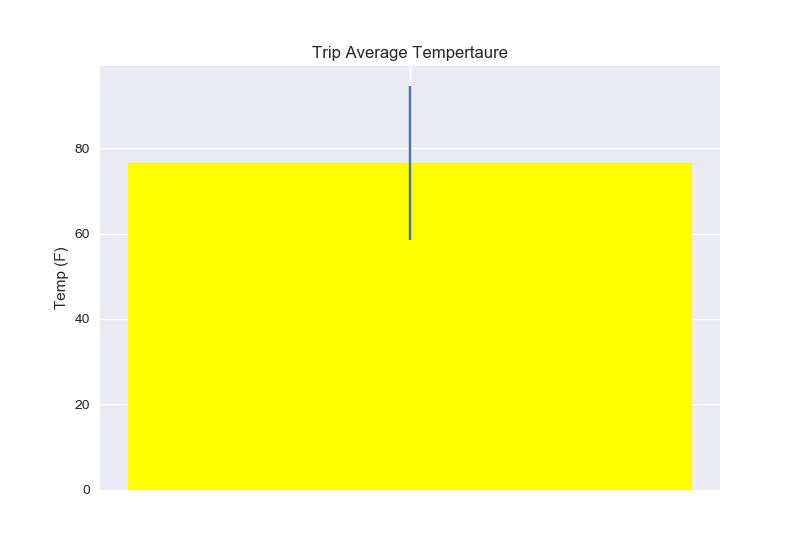

In [29]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
#     Use the average temperature as the bar height.
#     Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

ax = plt.subplot()
#fig, ax = plt.subplots()
x_value = ['']

y_value = [ret_temp_df.get_value(0, 'avg')]#ret_temp_df.get_value(0, 'avg') #ret_temp_df['avg'].values.tolist()

min1 = ret_temp_df.get_value(0, 'min')

max1 = ret_temp_df.get_value(0, 'max')

#range_error = [ret_temp_df.get_value(0, 'min'), ret_temp_df.get_value(0, 'max')]
#yerr1 = np.array([min1, max1])
variance = max1 - min1

ax.errorbar(x_value, y_value, yerr=variance, )

ax.bar(x_value, y_value, width = 3, color='yellow', label='temp')

#xtickNames = ax.set_xticklabels(xTickMarks)
#plt.setp(xtickNames, rotation=45, fontsize=10)

#ax.legend(loc='best')

#ax.set_xlabel("Date")
ax.set_ylabel("Temp (F)")
ax.set_title("Trip Average Tempertaure")
#ax.xaxis_date()
#ax.autoscale_view()

plt.show()

fig = ax.get_figure()
fig.savefig('Results/trip_average_temp.pdf')

In [30]:
'''ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], 
                                 ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], 
                                 names=['letter', 'word'])

df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, index=ix3)

# Group by index labels and take the means and standard deviations for each group
gp3 = df3.groupby(level=('letter', 'word'))

means = gp3.mean()

errors = gp3.std()

print (means)
print (errors)


# Plot
fig, ax = plt.subplots()

means.plot.bar(yerr=errors, ax=ax)'''

#plt.show()

"ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], \n                                 ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], \n                                 names=['letter', 'word'])\n\ndf3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, index=ix3)\n\n# Group by index labels and take the means and standard deviations for each group\ngp3 = df3.groupby(level=('letter', 'word'))\n\nmeans = gp3.mean()\n\nerrors = gp3.std()\n\nprint (means)\nprint (errors)\n\n\n# Plot\nfig, ax = plt.subplots()\n\nmeans.plot.bar(yerr=errors, ax=ax)"